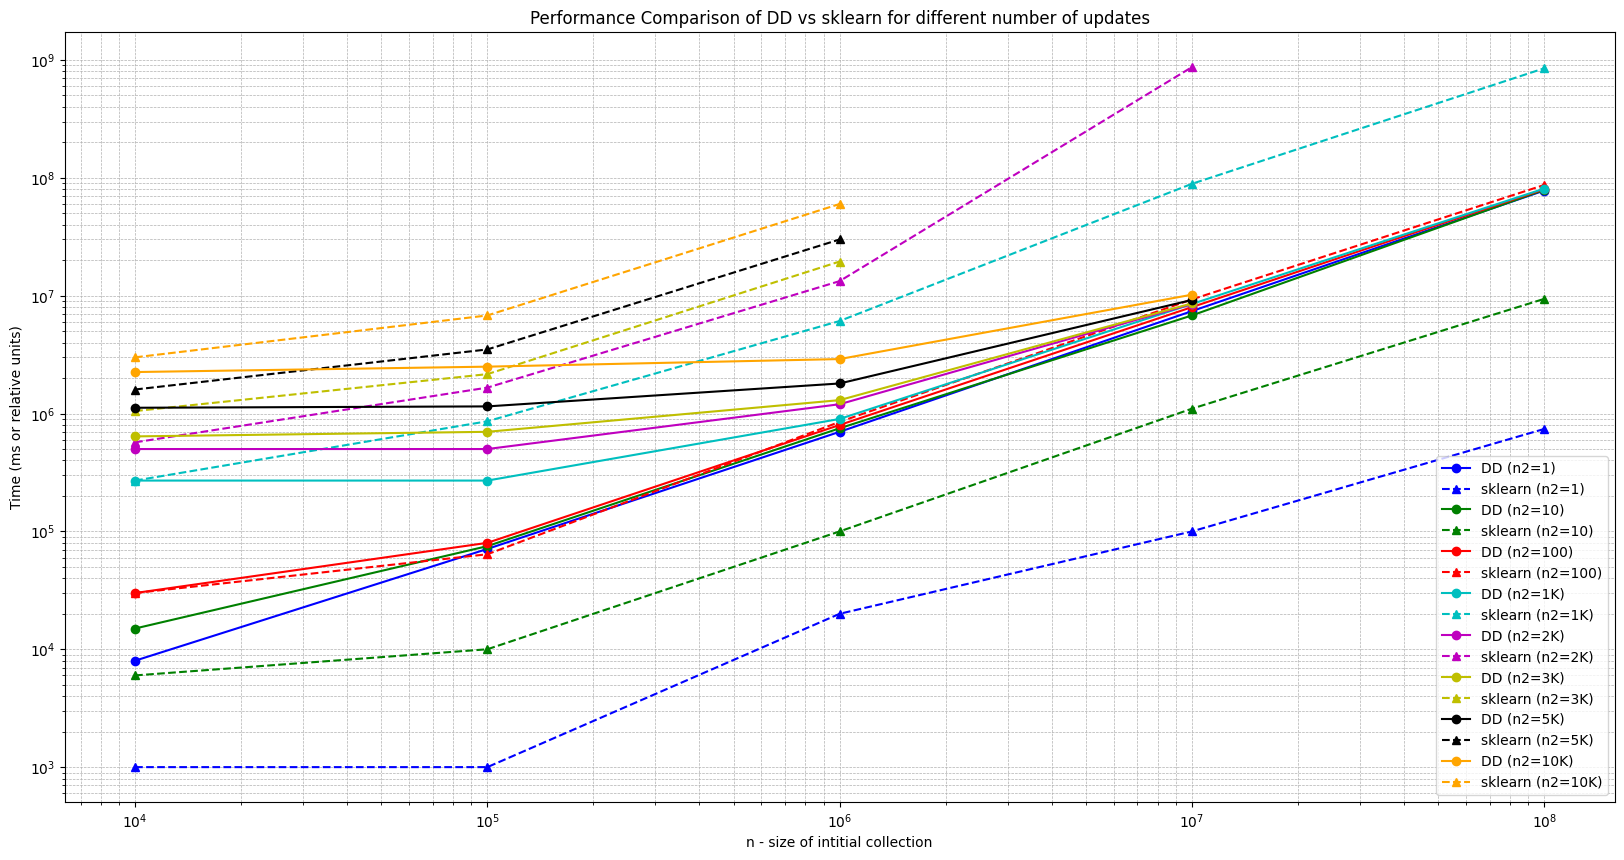

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Data extraction from table
n_values = np.array([10000, 100000, 1000000, 10000000, 100000000])
n2_values = np.array([1, 10, 100, 1000, 2000, 3000, 5000, 10000])

n_values_str = ["10K", "100K", "1M", "10M", "100M"]
n2_values_str = ["1", "10","100","1K", "2K", "3K", "5K", "10K"]

# Prototype 1 (DD) and Prototype 2 (sklearn) matrices
prototype_1 = np.array([
    [0.008,0.015, 0.03, 0.27, 0.5, 0.64, 1.12, 2.25],
    [0.071,0.075, 0.08, 0.27, 0.5, 0.7, 1.15, 2.5],
    [0.7,0.75, 0.8, 0.9, 1.2, 1.3, 1.8, 2.9],
    [7.4,6.8, 8.0, 8.5, 8.5, 8.6, 9.2, 10.2],
    [78, 79, 80, 81, -1, -1, -1, -1]  # Missing values
])
prototype_1 *= 1000000.0
prototype_1[prototype_1 < 0] = None

prototype_2 = np.array([
    [0.001, 0.006, 0.03, 0.27, 0.57, 1.05, 1.6, 3],
    [0.001, 0.01, 0.064, 0.86, 1.66, 2.16, 3.5, 6.8],
    [0.02, 0.1, 0.85, 6.1, 13.3, 19.5, 30.0, 60.0],
    [0.1, 1.1, 9.3, 89, 870, -1, -1, -1],
    [0.74, 9.4, 87, 850, -1, -1, -1, -1]  # Missing values
])
prototype_2 *= 1000000.0
prototype_2[prototype_2 < 0] = None

# Plotting
plt.figure(figsize=(20, 10))
markers = ['o', 's', 'D', '^', 'v']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink']


for i, n2 in enumerate(n2_values):
    plt.plot(n_values, prototype_1[:, i], marker=markers[0], linestyle='-', color=colors[i], label=f'DD (n2={n2_values_str[i]})')
    plt.plot(n_values, prototype_2[:, i], marker=markers[3], linestyle='--', color=colors[i], label=f'sklearn (n2={n2_values_str[i]})')

plt.xscale('log')  # Log scale for better visualization
plt.yscale('log')  # Log scale since values vary a lot
plt.xlabel('n - size of intitial collection')
plt.ylabel('Time (ms or relative units)')
plt.title('Performance Comparison of DD vs sklearn for different number of updates')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


/var/folders/76/rncr391x68g610svz4wb2cn00000gn/T/ipykernel_4014/3895383046.py:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim([0, 87100000])


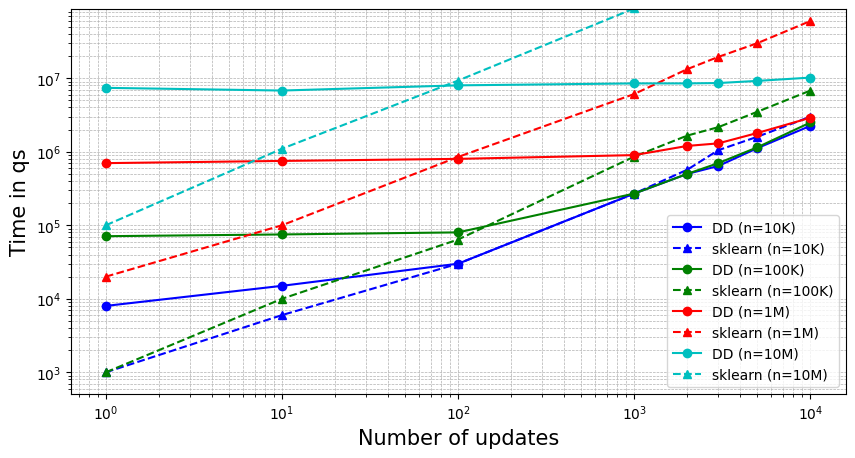

In [12]:
# Plotting
plt.figure(figsize=(10, 5))

for i, n in enumerate(n_values[:-1]):
    if i in [0, 1, 2, 3, 4, 5, 6]:
        plt.plot(n2_values, prototype_1.T[:, i], marker=markers[0], linestyle='-', color=colors[i], label=f'DD (n={n_values_str[i]})')
        plt.plot(n2_values, prototype_2.T[:, i], marker=markers[3], linestyle='--', color=colors[i], label=f'sklearn (n={n_values_str[i]})')

plt.xscale('log')  # Log scale for better visualization
plt.yscale('log')  # Log scale since values vary a lot
plt.xlabel('Number of updates', fontsize=15)
plt.ylabel('Time in qs', fontsize=15)
ax = plt.gca()
ax.set_ylim([0, 87100000])
plt.legend(loc=4, prop={'size': 10})
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [13]:
dd = np.array([[668, 5988, 61618, 610684, 6284705],
                 [655,5870,58900,629149,6160872],
                 [749,6189,59226,590506,6041268]])
dd_ = np.array([[11379,107969,1139505,11401946],
               [128677,1324288,13149748,131497480],
               [604529, 14360799, 151938998, None]])

updates = n2_values = np.array([10, 100, 1000, 10000, 100000])

In [14]:
sk = (prototype_2 - prototype_2[:,0].reshape((-1,1)))
sk = sk[:dd.shape[0],[1,2,3,7]]
sk

array([[5.000e+03, 2.900e+04, 2.690e+05, 2.999e+06],
       [9.000e+03, 6.300e+04, 8.590e+05, 6.799e+06],
       [8.000e+04, 8.300e+05, 6.080e+06, 5.998e+07]])

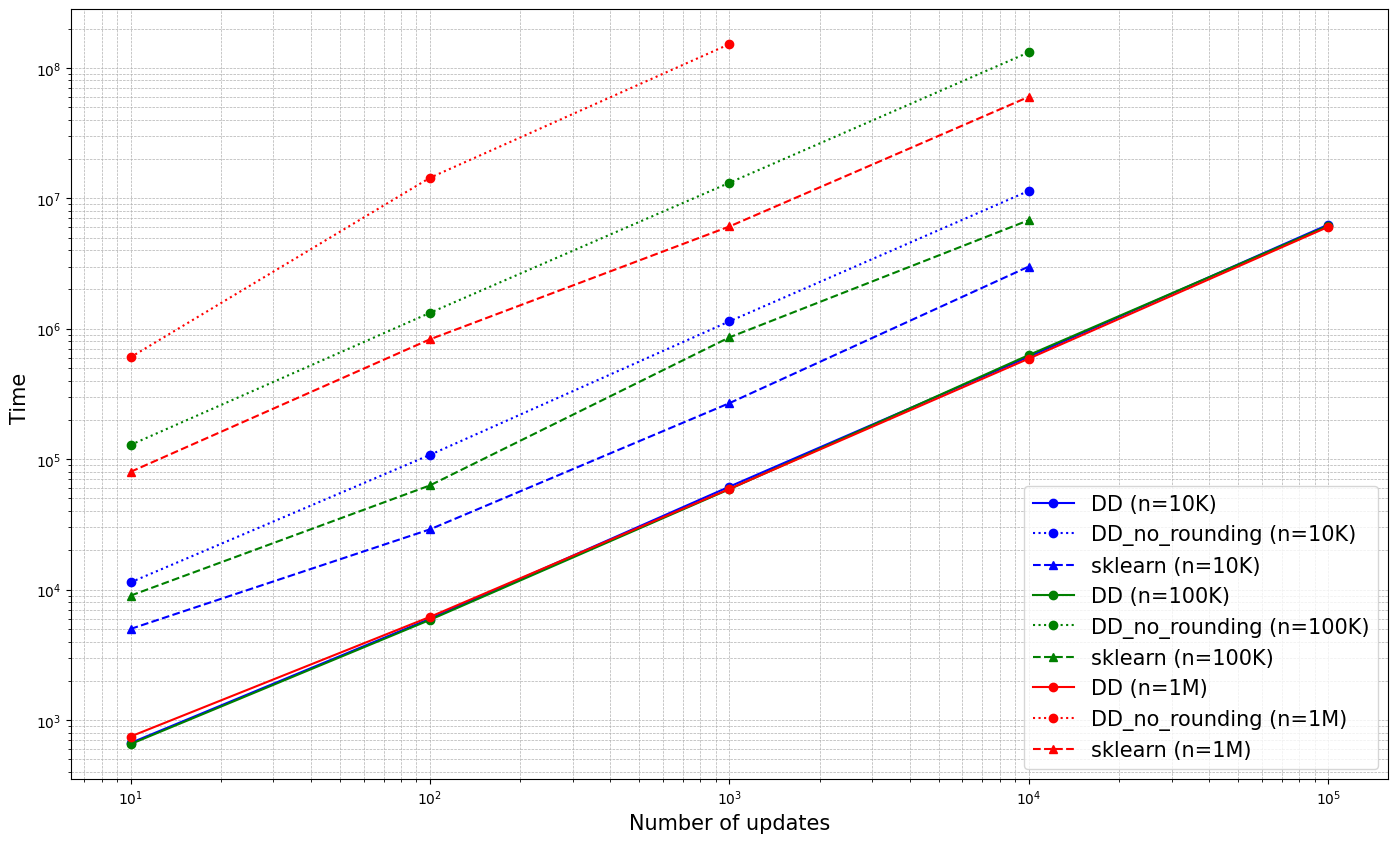

In [15]:

# Plotting
plt.figure(figsize=(17, 10))

for i in range(dd.shape[0]):
    if i in [0, 1, 2, 3, 4, 5, 6]:
        plt.plot(updates, dd[i,:], marker=markers[0], linestyle='-', color=colors[i],
                 label=f'DD (n={n_values_str[i]})')
        plt.plot(updates[:-1], dd_[i,:], marker=markers[0], linestyle=':', color=colors[i],
                 label=f'DD_no_rounding (n={n_values_str[i]})')
        plt.plot(updates[:-1], sk[i,:], marker=markers[3], linestyle='--', color=colors[i],
                 label=f'sklearn (n={n_values_str[i]})')

plt.xscale('log')  # Log scale for better visualization
plt.yscale('log')  # Log scale since values vary a lot
plt.xlabel('Number of updates', fontsize=15)
plt.ylabel('Time ', fontsize=15)
plt.legend(loc=4, prop={'size': 15})
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()